**A PROJECT BY:**

ΕΛΕΥΘΕΡΙΑ ΕΛΛΗΝΑ 1115201800228

ΣΤΥΛΙΑΝΟΣ ΨΑΡΑ 1115201800226

In [68]:
import pandas as pd
train = pd.read_csv('./drive/MyDrive/train.csv')
test = pd.read_csv('./drive/MyDrive/test.csv')
target = pd.read_csv('./drive/MyDrive/target.csv')

# 1. DATA ANALYSIS

## Ερώτημα 1

In [69]:
from statistics import stdev
mean_value = train['trip_duration'].mean()

max_duration = mean_value + 2*stdev(train['trip_duration'])

train = train.loc[train.trip_duration <= max_duration]

statistics = train.describe()
print(statistics)

          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.165250e+06     1.165250e+06      1.165250e+06     1.165250e+06   
mean   1.534260e+00     1.664723e+00     -7.397346e+01     4.075090e+01   
std    4.988251e-01     1.314119e+00      6.230739e-02     3.170862e-02   
min    1.000000e+00     0.000000e+00     -1.219332e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399186e+01     4.073732e+01   
50%    2.000000e+00     1.000000e+00     -7.398175e+01     4.075408e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076835e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     4.437194e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.165250e+06      1.165250e+06   1.165250e+06  
mean       -7.397340e+01      4.075182e+01   8.370149e+02  
std         6.159180e-02      3.645359e-02   6.590678e+02  
min        -1.219332e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01

## Ερώτημα 2

In [70]:
#LONGITUDE AND LATITUDE INSIDE NY
train = train.loc[(train['pickup_longitude'] > -74.03) & (train['dropoff_longitude'] < -73.75) & (train['pickup_longitude'] < -73.75) & (train['dropoff_longitude'] > -74.03)]
train = train.loc[(train['pickup_latitude'] > 40.63) & (train['dropoff_latitude'] < 40.85) & (train['pickup_latitude'] < 40.85) & (train['dropoff_latitude'] > 40.63)]

## Ερώτημα 3

In [71]:
#TO_DATETIME

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [72]:
#DAY_PERIOD

import datetime

time = train['pickup_datetime'].dt.time

period = []
for i in time:
  if (i >= datetime.time(6, 0)) & (i <= datetime.time(11, 59)):
    period.append('Morning')
  elif (i >= datetime.time(12, 0)) & (i <= datetime.time(15, 59)):
    period.append('Afternoon')
  elif (i >= datetime.time(16, 0)) & (i <= datetime.time(21, 59)):
    period.append('Evening')
  else:
    period.append('Late_Night')

train['day_period_pickup'] = period

time = train['dropoff_datetime'].dt.time

period = []
for i in time:
  if (i >= datetime.time(6, 0)) & (i <= datetime.time(11, 59)):
    period.append('Morning')
  elif (i >= datetime.time(12, 0)) & (i <= datetime.time(15, 59)):
    period.append('Afternoon')
  elif (i >= datetime.time(16, 0)) & (i <= datetime.time(21, 59)):
    period.append('Evening')
  else:
    period.append('Late_Night')

train['day_period_dropoff'] = period

time = test['pickup_datetime'].dt.time

period = []
for i in time:
  if (i >= datetime.time(6, 0)) & (i <= datetime.time(11, 59)):
    period.append('Morning')
  elif (i >= datetime.time(12, 0)) & (i <= datetime.time(15, 59)):
    period.append('Afternoon')
  elif (i >= datetime.time(16, 0)) & (i <= datetime.time(21, 59)):
    period.append('Evening')
  else:
    period.append('Late_Night')

test['day_period_pickup'] = period

In [73]:
#DAY_NAME

train['day_name_pickup'] = train['pickup_datetime'].dt.day_name()
train['day_name_dropoff'] = train['dropoff_datetime'].dt.day_name()

test['day_name_pickup'] = test['pickup_datetime'].dt.day_name()

In [74]:
#MONTH

train['month_pickup'] = train['pickup_datetime'].dt.month
train['month_dropoff'] = train['dropoff_datetime'].dt.month
for i in train['month_pickup']:
  if i == 7:
    print(i)
test['month_pickup'] = test['pickup_datetime'].dt.month

In [75]:
#HOUR

train['hour_pickup'] = train['pickup_datetime'].dt.hour
train['hour_dropoff'] = train['dropoff_datetime'].dt.hour

test['hour_pickup'] = test['pickup_datetime'].dt.hour

In [76]:
#YEAR

train['year_pickup'] = train['pickup_datetime'].dt.year
train['year_dropoff'] = train['dropoff_datetime'].dt.year

test['year_pickup'] = test['pickup_datetime'].dt.year

In [77]:
#SEASON


season = []
for i in train['month_pickup']:
  if (i == 12) | (i == 1) | (i == 2):
    season.append('Winter')
  elif (i == 3) | (i == 4) | (i == 5):
    season.append('Spring')
  elif (i == 6) | (i == 7) | (i == 8):
    season.append('Summer')
  else:
    season.append('Autumn')

train['season_pickup'] = season

season = []
for i in train['month_dropoff']:
  if (i == 12) | (i == 1) | (i == 2):
    season.append('Winter')
  elif (i == 3) | (i == 4) | (i == 5):
    season.append('Spring')
  elif (i == 6) | (i == 7) | (i == 8):
    season.append('Summer')
  else:
    season.append('Autumn')

train['season_dropoff'] = season

season = []
for i in test['month_pickup']:
  if (i == 12) | (i == 1) | (i == 2):
    season.append('Winter')
  elif (i == 3) | (i == 4) | (i == 5):
    season.append('Spring')
  elif (i == 6) | (i == 7) | (i == 8):
    season.append('Summer')
  else:
    season.append('Autumn')

test['season_pickup'] = season

**ΑΠΕΙΚΟΝΙΖΟΝΤΕ ΜΟΝΟ ΤΑ ΙΣΤΟΓΡΑΜΜΑΤΑ ΤΩΝ PICK UP DAYS ΚΑΘΩΣ ΤΑ ΙΣΤΟΓΡΑΜΜΑΤΑ ΤΩΝ DROP OFF DAYS ΕΙΝΑΙ ΤΑ ΙΔΙΑ**

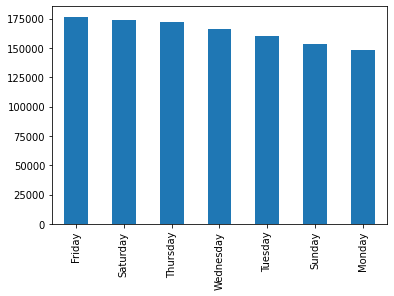

In [78]:
#HISTOGRAM FOR PICK UP DAYS
train['day_name_pickup'].value_counts().plot(kind = 'bar')

Παρατήρουμε ότι τις Παρασκευές καθώς και το Σάββατο, το πλήθος των διαδρομών που πραγματοποιούνται είναι μεγαλύτερο από τς υπόλοιπες μέρες. Αποτέλεσμα λογικό, αφού είναι μέρες που ο κόσμος εκμεταλέυεται αφού την επόμενη μέρα δεν εργάζεται.

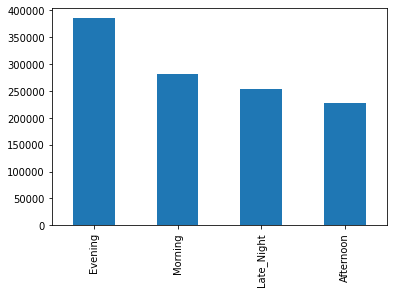

In [79]:
#HISTOGRAM FOR TRIPS PER DAY_PERIOD PICK UP
train['day_period_pickup'].value_counts().plot(kind = 'bar')

Παρατηρούμε ότι το απόγευμα είναι η περιόδος της μέρας με τα περισσότερα ταξίδια, αφού συνήθως ο περισσότερος κόσμος φεύγει από τη δουλειά του για να πάει σπίτι ή βόλτα.

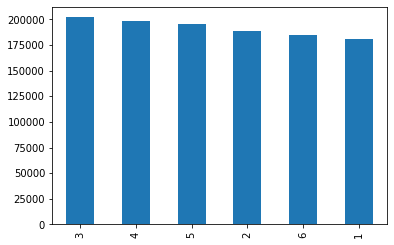

In [80]:
#HISTOGRAM FOR TRIPS PER MONTH PICK UP
train['month_pickup'].value_counts().plot(kind = 'bar')

Παρατηρούμε ότι ο μήνας με τις περισσότερες διαδρομές είναι ο Μάρτιος. Θα μπορούσαμε να υποθέσουμε ότι είναι ο πρώτος μήνας μετά τον εγκλεισμό του χειμώνα, όπου ο κόσμος αρχίζει να χαίρετε την άνοιξη.

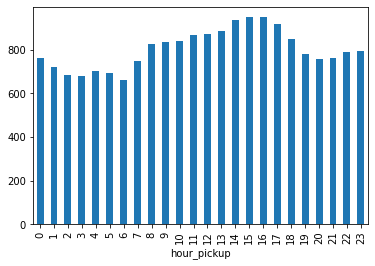

In [81]:
#HISTOGRAM FOR MEAN TIME OF TRIP PER PICKUP HOUR
train.groupby('hour_pickup')['trip_duration'].mean().plot(kind = 'bar')

Παρατηρούμε για ακόμη μία φορά ότι οι περισσότερες διαδρομές γίνονται στις 15:00 με 16:00, για τους λόγους που αναφέραμε παραπάνω.

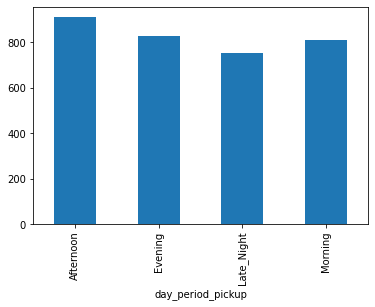

In [82]:
#HISTOGRAM FOR MEAN TIME OF TRIP PER DAY_PERIOD PICK UP
train.groupby('day_period_pickup')['trip_duration'].mean().plot(kind = 'bar')

Παρατηρούμε ότι η μέση διάρκεια ταξιδιού είναι μεγαλύτερη κατά το μεσημέρι. Θα μπορούσαμε να το δικαιολογήσουμε με την αυξημένη κίνηση που συναντούμε κατ' αυτή την περίοδο.

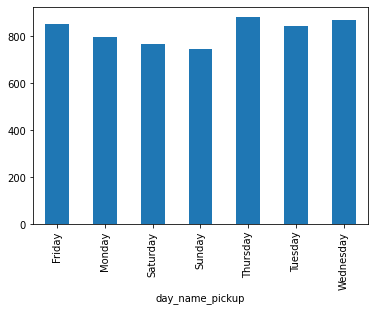

In [83]:
#HISTOGRAM FOR MEAN TIME OF TRIP PER DAY_NAME PICK UP
train.groupby('day_name_pickup')['trip_duration'].mean().plot(kind = 'bar')

Παρατηρούμε ότι η μέση διάρκεια ταξιδιού είναι μεγαλύτερη την Πέμπτη.

## Ερώτημα 4

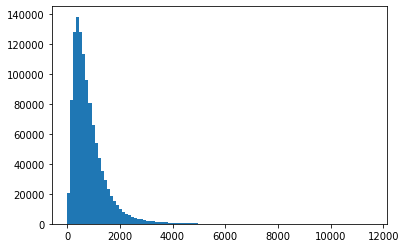

In [84]:
#HISTOGRAM FOR TRIP DURATION 
import matplotlib.pylab as plt
plot = plt.hist(train['trip_duration'], bins = 100)

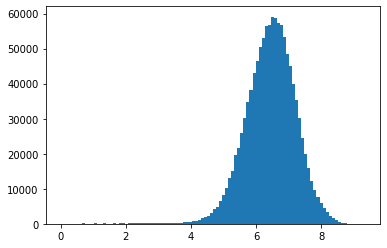

In [85]:
import numpy as np
train['log_trip_duration'] = np.log(train['trip_duration'])
plot = plt.hist(train['log_trip_duration'], bins = 100)

## Ερώτημα 5

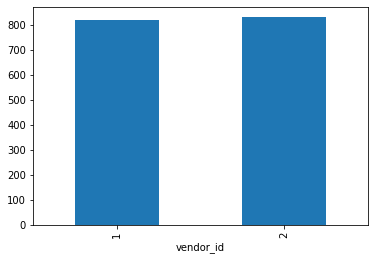

In [86]:
#HISTOGRAM OF MEAN TIME OF TRIP PER VENDOR
train.groupby('vendor_id')['trip_duration'].mean().plot(kind = 'bar')

## Ερώτημα 6

In [87]:
#MEAN TIME OF TRIP PER DAY_PERIOD PICK UP
mean_time = train.groupby('passenger_count')['trip_duration'].mean()
print(mean_time)

passenger_count
0    256.023256
1    813.125371
2    863.162575
3    854.087507
4    877.430226
5    832.208717
6    823.179864
Name: trip_duration, dtype: float64


Βλέπουμε με μεγάλο πλήθος ατόμων, το ταξίδι διαρκεί περισσότερο, ενώ όταν είναι λιγότερα τα άτομα είναι μικρότερη η διάρκειά του. Στη μέγιστη περίπτωση, βλέπουμε ότι το ταξίδι διαρκεί ακόμη περισσότερο με το πλήθος ατόμων να είναι 4, ενώ στην ελάχιστη περίπτωση βλέπουμε τον οδηγό να ταξιδεύει μόνος του.

## Ερώτημα 7

In [88]:
#HAVERSINE
def haversine(lat_up, lon_up, lat_off, lon_off):     
    R = 6371000       
    dLat, dLon, lat_up, lat_off = np.radians(lat_off - lat_up), np.radians(lon_off - lon_up), np.radians(lat_up), np.radians(lat_off)     
    
    a =  np.sin(dLat/2) ** 2 + np.cos(lat_up) * np.cos(lat_off) * np.sin(dLon/2) ** 2     
    c = 2 * np.arcsin(np.sqrt(a))          
    return R * c

In [89]:
#MANHATTAN DISTANCE FROM DEGREES TO METERS USING HARVISINE
def manhattan_dist(lat_up, lon_up, lat_off, lon_off):
    p = np.stack([lat_up, lon_up], axis = 1)
    d = np.stack([lat_off, lon_off], axis = 1)
    
    theta1 = np.radians(-28.904)
    theta2 = np.radians(28.904)
    
    R1 = np.array([[np.cos(theta1), np.sin(theta1)], [-np.sin(theta1), np.cos(theta1)]])
    R2 = np.array([[np.cos(theta2), np.sin(theta2)], [-np.sin(theta2), np.cos(theta2)]])

    pT = R1 @ p.T  
    dT = R1 @ d.T  

    vT = np.stack((pT[0,:], dT[1,:]))
    v = R2 @ vT

    return (haversine(p.T[0], p.T[1], v[0], v[1]) + haversine(v[0], v[1], d.T[0], d.T[1]))

In [90]:
train['manhattan'] = manhattan_dist(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
test['manhattan'] = manhattan_dist(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])

**ΑΠΕΙΚΟΝΙΖΟΝΤΕ ΜΟΝΟ ΤΑ ΙΣΤΟΓΡΑΜΜΑΤΑ ΤΩΝ PICK UP DAYS ΚΑΘΩΣ ΤΑ ΙΣΤΟΓΡΑΜΜΑΤΑ ΤΩΝ DROP OFF DAYS ΕΙΝΑΙ ΤΑ ΙΔΙΑ**

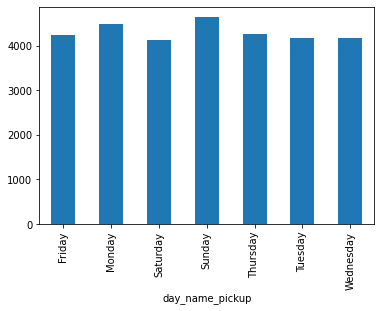

In [91]:
#HISTOGRAM FOR MEAN DISTANCE OF TRIP PER DAY_NAME PICKUP
train.groupby(train['day_name_pickup'])['manhattan'].mean().plot(kind = 'bar')

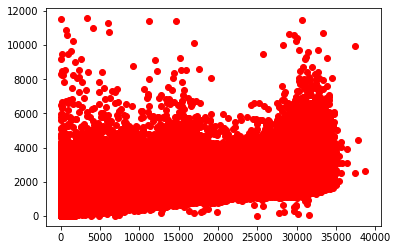

In [92]:
#HISTOGRAM FOR TRIP DISTANCE TO TRIP DURATION
plt.scatter(train['manhattan'], train['trip_duration'], color = 'red')

##Ερώτημα 8

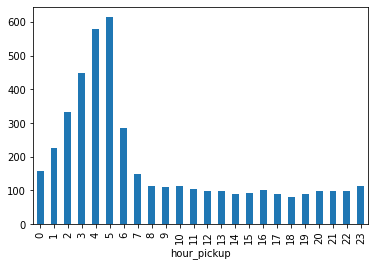

In [93]:
#HISTOGRAM FOR MEAN VELOCITY PER HOUR
(train['manhattan'].sum() / train.groupby('hour_pickup')['trip_duration'].sum()).plot(kind = 'bar')

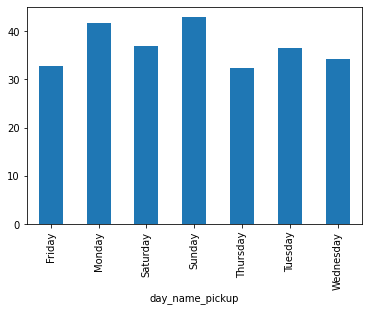

In [94]:
#HISTOGRAM FOR MEAN VELOCITY PER DAY NAME
(train['manhattan'].sum() / train.groupby('day_name_pickup')['trip_duration'].sum()).plot(kind = 'bar')

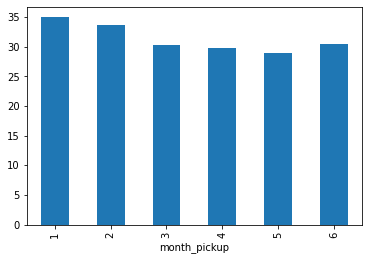

In [95]:
#HISTOGRAM FOR MEAN VELOCITY PER MONTH
(train['manhattan'].sum() / train.groupby('month_pickup')['trip_duration'].sum()).plot(kind = 'bar')

##Ερώτημα 9

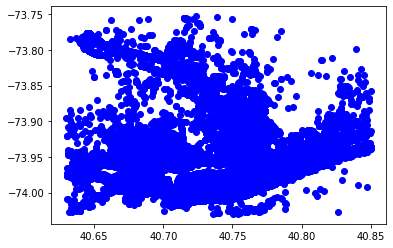

In [96]:
#SCATTER FOR PICK UP
plt.scatter(train['pickup_latitude'], train['pickup_longitude'], color = 'blue')

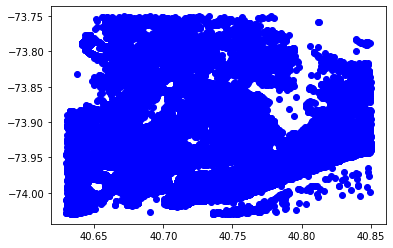

In [97]:
#SCATTER FOR DROP OFF
plt.scatter(train['dropoff_latitude'], train['dropoff_longitude'], color = 'blue')

#2. CLUSTERING AND PREDICTIONS

##Ερώτημα 1

In [98]:
from sklearn.cluster import KMeans

X = np.asarray(train['pickup_latitude']).reshape(1149733, 1)
y = np.asarray(train['pickup_longitude']).reshape(1149733, 1)



distortions = []
K = range(1,10)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X, y)
  distortions.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

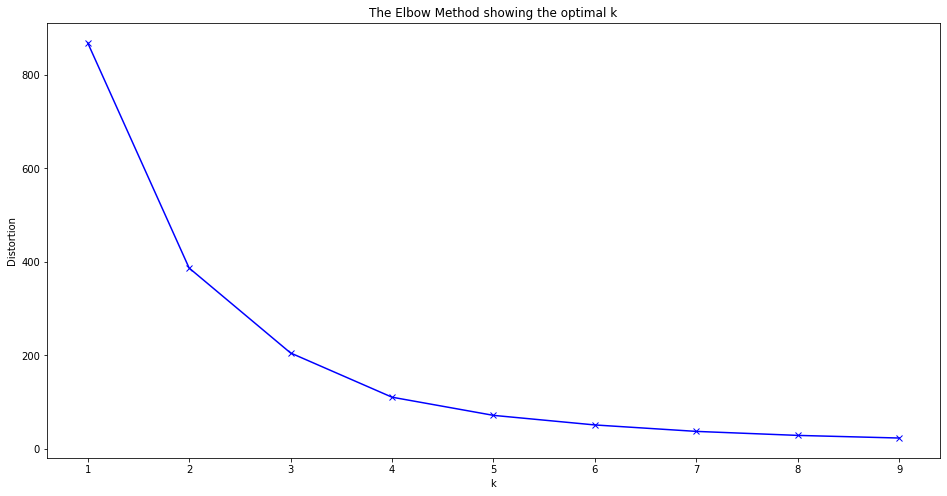

In [99]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [100]:
lat =  np.asarray(train['pickup_latitude'])
lon = np.asarray(train['pickup_longitude'])
X = np.vstack((lon, lat)).T

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

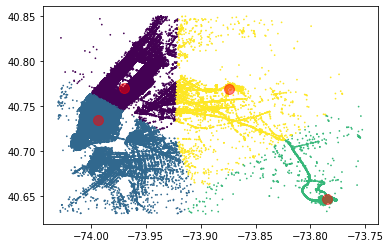

In [101]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=0.5, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

##Ερώτημα 2

In [ ]:
feature_names = ["vendor_id", "passenger_count",  "pickup_longitude",  "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "day_name_pickup", "month_pickup", "season_pickup", "day_period_pickup", "hour_pickup", "manhattan"]

new_train = train.sample(frac=0.1)
X_train = new_train[feature_names]

X_train.loc[X_train['day_name_pickup'] == "Monday", "day_name_pickup"] = 0
X_train.loc[X_train['day_name_pickup'] == "Tuesday", "day_name_pickup"] = 1
X_train.loc[X_train['day_name_pickup'] == "Wednesday", "day_name_pickup"] = 2
X_train.loc[X_train['day_name_pickup'] == "Thursday", "day_name_pickup"] = 3
X_train.loc[X_train['day_name_pickup'] == "Friday", "day_name_pickup"] = 4
X_train.loc[X_train['day_name_pickup'] == "Saturday", "day_name_pickup"] = 5
X_train.loc[X_train['day_name_pickup'] == "Sunday", "day_name_pickup"] = 6

X_train.loc[X_train['season_pickup'] == "Winter", "season_pickup"] = 0
X_train.loc[X_train['season_pickup'] == "Spring", "season_pickup"] = 1
X_train.loc[X_train['season_pickup'] == "Summer", "season_pickup"] = 2
X_train.loc[X_train['season_pickup'] == "Autumn", "season_pickup"] = 3

X_train.loc[X_train['day_period_pickup'] == "Morning", "day_period_pickup"] = 0
X_train.loc[X_train['day_period_pickup'] == "Afternoon", "day_period_pickup"] = 1
X_train.loc[X_train['day_period_pickup'] == "Evening", "day_period_pickup"] = 2
X_train.loc[X_train['day_period_pickup'] == "Late_Night", "day_period_pickup"] = 3

X_test = test[feature_names]

X_test.loc[X_test['day_name_pickup'] == "Monday", "day_name_pickup"] = 0
X_test.loc[X_test['day_name_pickup'] == "Tuesday", "day_name_pickup"] = 1
X_test.loc[X_test['day_name_pickup'] == "Wednesday", "day_name_pickup"] = 2
X_test.loc[X_test['day_name_pickup'] == "Thursday", "day_name_pickup"] = 3
X_test.loc[X_test['day_name_pickup'] == "Friday", "day_name_pickup"] = 4
X_test.loc[X_test['day_name_pickup'] == "Saturday", "day_name_pickup"] = 5
X_test.loc[X_test['day_name_pickup'] == "Sunday", "day_name_pickup"] = 6

X_test.loc[X_test['season_pickup'] == "Winter", "season_pickup"] = 0
X_test.loc[X_test['season_pickup'] == "Spring", "season_pickup"] = 1
X_test.loc[X_test['season_pickup'] == "Summer", "season_pickup"] = 2
X_test.loc[X_test['season_pickup'] == "Autumn", "season_pickup"] = 3

X_test.loc[X_test['day_period_pickup'] == "Morning", "day_period_pickup"] = 0
X_test.loc[X_test['day_period_pickup'] == "Afternoon", "day_period_pickup"] = 1
X_test.loc[X_test['day_period_pickup'] == "Evening", "day_period_pickup"] = 2
X_test.loc[X_test['day_period_pickup'] == "Late_Night", "day_period_pickup"] = 3

In [ ]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, new_train['log_trip_duration'])

RandomForestRegressor()

In [ ]:
y_pred_1 = clf.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

y = np.log(target['trip_duration'])

mae = metrics.mean_absolute_error(y, y_pred_1)
mse = metrics.mean_squared_error(y, y_pred_1)

print("Results of RandomForestRegressor:")
print("MAE: ", mae)
print("MSE: ", mse)

Results of RandomForestRegressor:
MAE:  0.2844504675634876
MSE:  0.19178987014222149


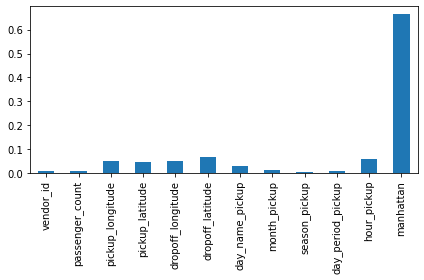

In [ ]:
#IMPORTANT FEATURES
importances = clf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()

##Ερώτημα 3

In [ ]:
#GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [200, 500], 'max_depth': [4,5,6,7,8] ,'max_features': [2, 5 ,8]}]

grid = GridSearchCV(clf, param_grid)
grid.fit(X_train, new_train['log_trip_duration'])

GridSearchCV(estimator=RandomForestRegressor(max_depth=10),
             param_grid=[{'max_depth': [4, 5, 6, 7, 8],
                          'max_features': [2, 5, 8],
                          'n_estimators': [200, 500]}])

In [ ]:
print(grid.best_params_)

{'max_depth': 8, 'max_features': 8, 'n_estimators': 500}


In [ ]:
y_pred_2 = grid.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y, y_pred_2)
mse = metrics.mean_squared_error(y, y_pred_2)

print("Results of RandomForestRegressor:")
print("MAE: ", mae)
print("MSE: ", mse)

Results of RandomForestRegressor:
MAE:  0.3162772671738845
MSE:  0.2165933973251919


##Ερώτημα 4

In [ ]:
#RANDOM FOREST WITH NEW PARAMETERS
clf = RandomForestRegressor(n_estimators= 50, max_depth= 10, max_features= 'auto')
clf.fit(X_train, new_train['log_trip_duration'])

RandomForestRegressor(max_depth=10, n_estimators=50)

In [ ]:
y_pred_3 = clf.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y, y_pred_3)
mse = metrics.mean_squared_error(y, y_pred_3)

print("Results of RandomForestRegressor:")
print("MAE: ", mae)
print("MSE: ", mse)

Results of RandomForestRegressor:
MAE:  0.30500340281730026
MSE:  0.20742694046567112
